In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score


In [2]:
pip install scikit-learn==1.1.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn

In [4]:
sklearn.__version__

'1.1.3'

In [5]:
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [6]:
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# EDA

In [10]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
bos['target']=boston.target

bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<Axes: >

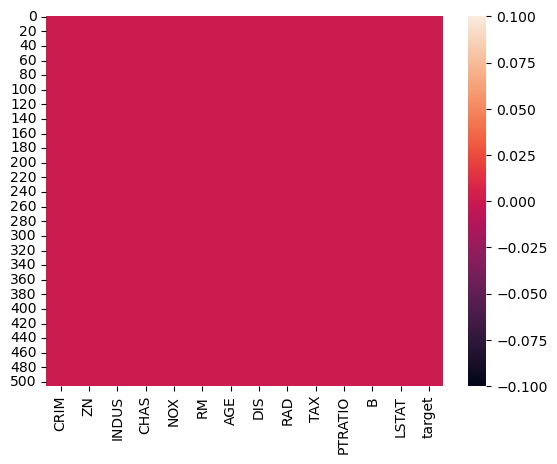

In [13]:
sns.heatmap(bos.isnull())

In [14]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

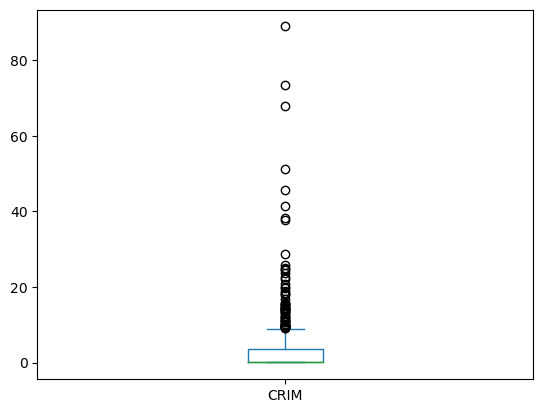

In [15]:
bos['CRIM'].plot.box()

CRIM          Axes(0.125,0.53;0.0945122x0.35)
ZN         Axes(0.238415,0.53;0.0945122x0.35)
INDUS      Axes(0.351829,0.53;0.0945122x0.35)
CHAS       Axes(0.465244,0.53;0.0945122x0.35)
NOX        Axes(0.578659,0.53;0.0945122x0.35)
RM         Axes(0.692073,0.53;0.0945122x0.35)
AGE        Axes(0.805488,0.53;0.0945122x0.35)
DIS           Axes(0.125,0.11;0.0945122x0.35)
RAD        Axes(0.238415,0.11;0.0945122x0.35)
TAX        Axes(0.351829,0.11;0.0945122x0.35)
PTRATIO    Axes(0.465244,0.11;0.0945122x0.35)
B          Axes(0.578659,0.11;0.0945122x0.35)
LSTAT      Axes(0.692073,0.11;0.0945122x0.35)
target     Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

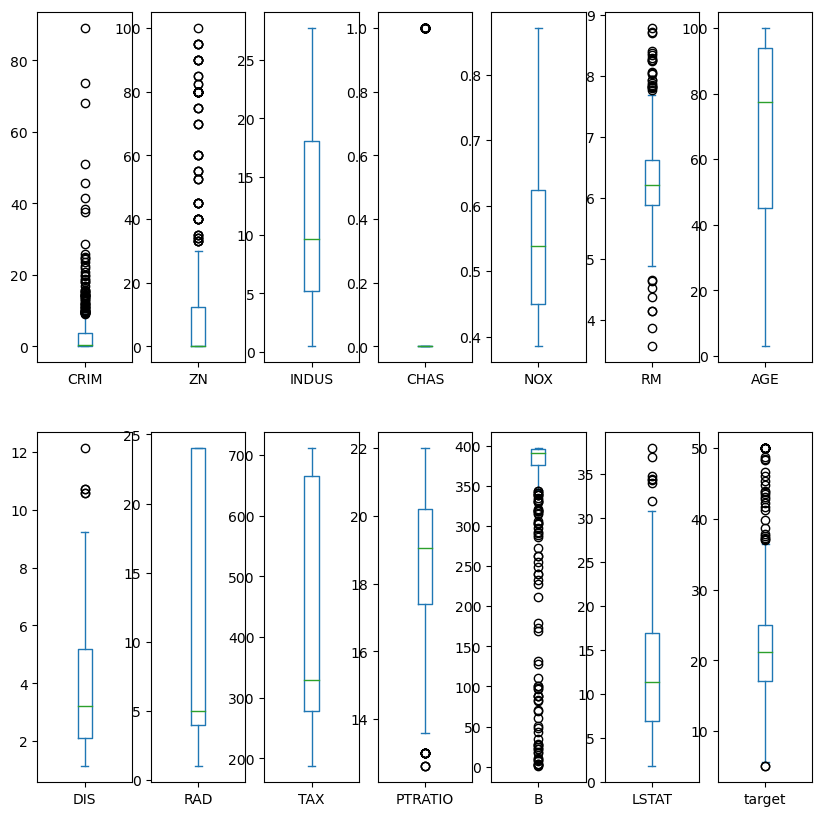

In [16]:
bos.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

In [17]:
bos.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<Axes: ylabel='Frequency'>

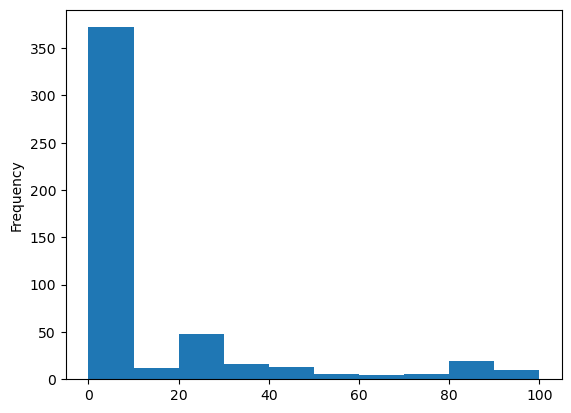

In [18]:
bos['ZN'].plot.hist()

<Axes: ylabel='Frequency'>

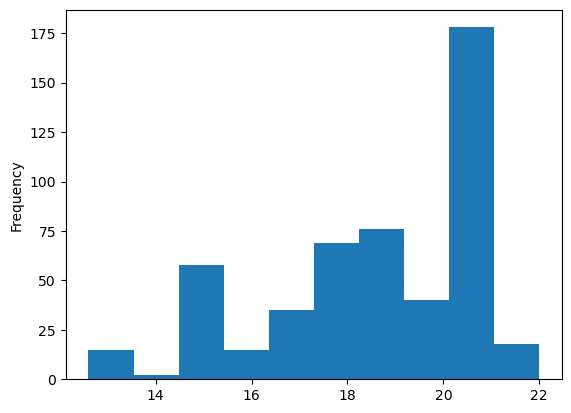

In [19]:
bos['PTRATIO'].plot.hist()

<Axes: ylabel='Frequency'>

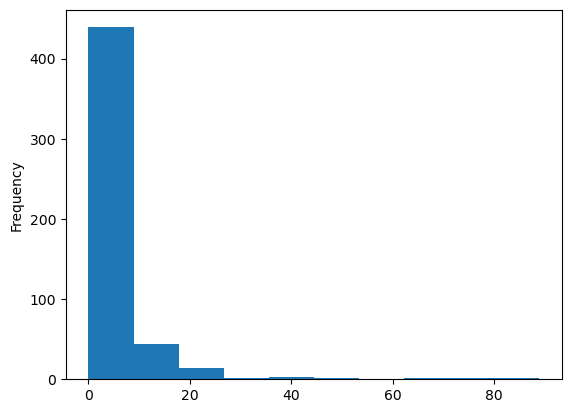

In [20]:
bos['CRIM'].plot.hist()

<Axes: ylabel='Frequency'>

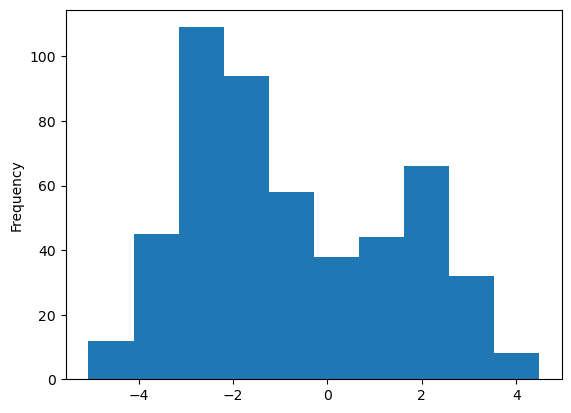

In [21]:
bos['CRIM']=np.log(bos['CRIM']) #REMOVE THE SKEWNESS 
bos['CRIM'].plot.hist()         #PROCESS --- 1

In [22]:
from scipy.stats import boxcox   # PROCESS --- 2

#bos['CRIM']=boxcox(bos['CRIM'],0)
#bos['CRIM']=boxcox(bos[.CRIM],.5)

#0  --- LOG TRANSFORM
#.5 --- SQUARE ROOT TRANSFORM


#bos['CRIM'].plot.hist()

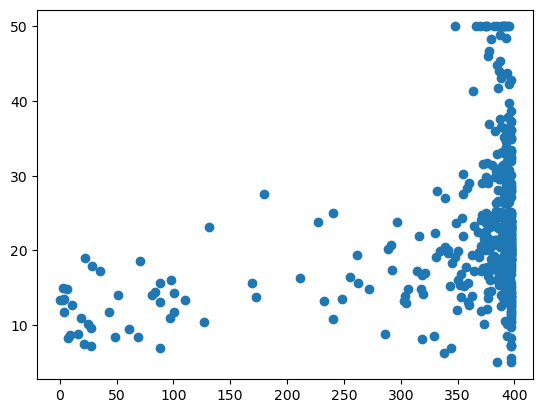

In [23]:
plt.scatter(bos['B'],bos['target'])
plt.show()

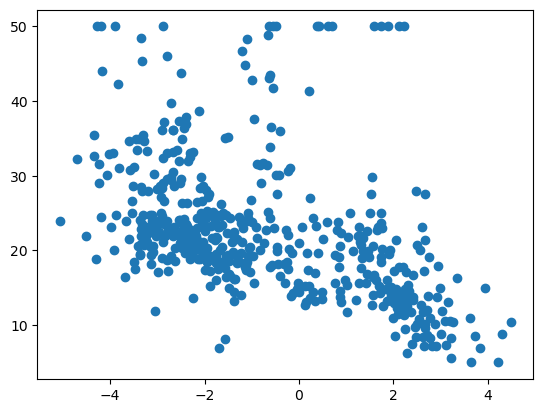

In [24]:
plt.scatter(bos['CRIM'],bos['target'])


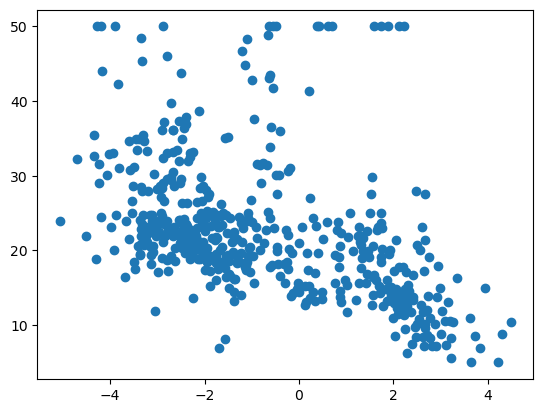

In [25]:
x=bos['CRIM']
y=bos['target']
plt.scatter(x,y)
plt.show()

In [26]:
bos_cor=bos.corr()
bos_cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.517091,0.730821,0.028496,0.788616,-0.306943,0.658284,-0.681903,0.853407,0.828234,0.389554,-0.478755,0.626615,-0.454302
ZN,-0.517091,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.730821,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.028496,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.788616,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.306943,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.658284,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.681903,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.853407,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.828234,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

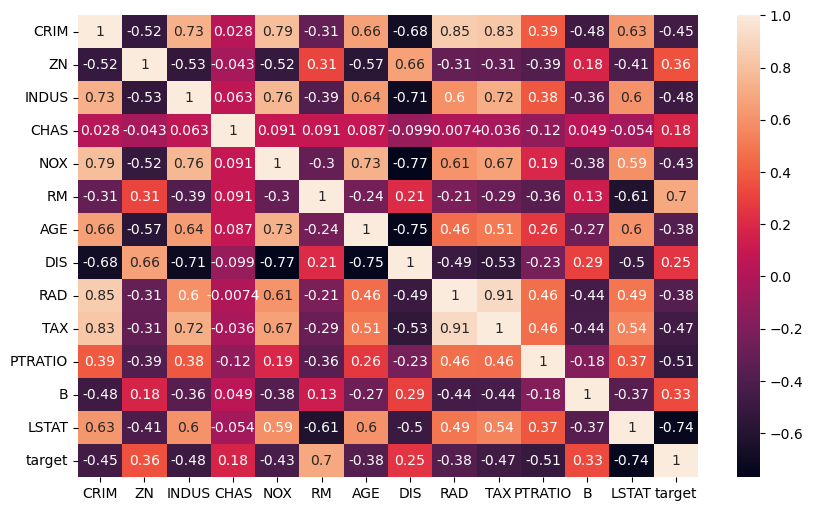

In [27]:

plt.figure(figsize=(10,6))
sns.heatmap(bos_cor,annot=True)

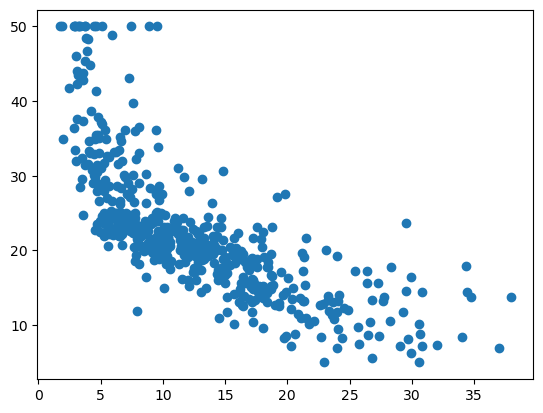

In [28]:
plt.scatter(bos['LSTAT'],bos['target'])

In [29]:
bos.drop('LSTAT',axis=1,inplace=True)

In [30]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [31]:
from scipy.stats import zscore
z=np.abs(zscore(bos))
z

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,1.983228,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,0.159686
1,1.305639,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.101524
2,1.305978,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.324247
3,1.226942,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.182758
4,0.876187,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.921368,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.014454
502,1.071652,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.210362
503,0.935402,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.148802
504,0.662329,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.057989


In [32]:
thresold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 142, 152, 154, 155, 160, 162, 163, 199, 200,
       201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219, 220,
       221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276, 277,
       282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356, 357,
       358, 363, 364, 364, 365, 367, 369, 370, 372, 374, 406, 410, 411,
       412, 415, 416, 418, 419, 423, 424, 425, 426, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,  5,
        3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,  3,
        3,  3,  3,  3,  5,  5,  5,  3,  3,  3,  5,  5, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11], dtype=int64))


In [33]:
bos_new=bos[(z<3).all(axis=1)]
bos_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


# Ml model build up

In [34]:
bos=bos_new
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


In [35]:
x=bos.iloc[:,0:-1]
y=bos.iloc[:,-1]
print (x,y)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0   -5.064036  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1   -3.600502   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2   -3.601235   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3   -3.430523   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4   -2.672924   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501 -2.770511   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502 -3.095111   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503 -2.800824   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504 -2.211009   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505 -3.048922   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  
0       15.3  396.90  
1       17.8  396.90  
2       17.8  392.

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [37]:
x_train.shape

(337, 12)

In [38]:
x_test.shape

(85, 12)

In [39]:
lm=LinearRegression()
predlm=lm.fit(x_train,y_train)
print ('Model Score: ', lm.score(x_train,y_train))

Model Score:  0.6668856399885037


In [40]:
lm.coef_

array([-1.00775293e-01, -1.46589752e-02,  4.98670176e-03,  1.27637484e-13,
       -1.35794836e+01,  7.18781119e+00, -5.77218413e-02, -1.08045764e+00,
        1.50735708e-01, -1.13420719e-02, -9.64307518e-01,  8.48806022e-03])

In [41]:
lm.intercept_

10.493802890653157

In [42]:
predvalue=lm.predict(x_test)

print ('Predict Value:', predvalue)
print ('Actual Value:', y_test)

Predict Value: [20.52396057 15.78888413 38.33816039 17.95479452 20.34755651 22.68645216
 15.84493944  9.40048996 14.20262011 24.04072584 25.75157403 37.69592813
 16.94648508 26.58387844  6.79051662 20.95745406 20.33877244 27.25730018
 39.77776592 24.20899468 20.97657446 28.50844561 22.21058326 36.59762041
 20.53369696 14.48709261 18.97493939 21.12064945 22.77306418 24.76667066
 20.13346312 21.78539121 27.61720745 27.63767619 18.37019864 39.84938444
 25.57220736 27.57366682 32.37734542 33.33199252 22.67722217 21.68579763
 23.90521372 14.53235502 21.03639655 19.65885947 12.02552608 19.82992805
 17.16679917 17.31598753 24.80945808 21.81676975 27.9318394  16.50077429
 18.87414517 24.24722181 21.34867433 22.22693452 27.73466506 27.47021782
 19.36876843 21.58187829 13.17684075 19.08800817 27.15800369 17.40888367
 25.35247201 26.22363433 20.41612433 19.42915623 19.37811064 16.34725792
 22.16488402 24.29778829 18.00451983 22.6859696  23.7727312  24.32729387
 15.01376784 21.61312806 16.17194102

In [43]:
print ('Error:')
print ('Mean Absolute Error:', mean_absolute_error(y_test,predvalue))
print ('Mean Squared Error:', mean_squared_error(y_test,predvalue))
print ('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predvalue)))

Error:
Mean Absolute Error: 2.5912933205392408
Mean Squared Error: 12.06607208255324
Root Mean Squared Error: 3.4736252075538085


In [44]:
from sklearn.metrics import r2_score

In [45]:
print (r2_score(y_test,predvalue))

0.806862711144333


In [46]:
p=np.array([0.00623,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,369.60])



In [47]:
p.shape

(12,)

In [48]:
p=p.reshape(1,-1)

p.shape

(1, 12)

In [49]:
lm.predict(p)

array([27.18915781])